In [25]:
import os
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import utils


## prf

In [18]:

filenames = utils.search_files("/home/anichikage/workspace/dram/dram-failure-prediction/results/csv", includes=["csv", "worule"], excludes=[], type="file")


In [19]:
filenames

['/home/anichikage/workspace/dram/dram-failure-prediction/results/csv/exp_vit_32x16_l4_c3_worule.csv',
 '/home/anichikage/workspace/dram/dram-failure-prediction/results/csv/exp_cnn_32x16_l4_c1_worule.csv',
 '/home/anichikage/workspace/dram/dram-failure-prediction/results/csv/exp_cnn_32x16_l4_c3_worule.csv',
 '/home/anichikage/workspace/dram/dram-failure-prediction/results/csv/exp_resnet_32x16_l2_c1_worule.csv',
 '/home/anichikage/workspace/dram/dram-failure-prediction/results/csv/exp_cnn_32x16_l2_c1_worule.csv',
 '/home/anichikage/workspace/dram/dram-failure-prediction/results/csv/exp_resnet_32x16_l4_c3_worule.csv',
 '/home/anichikage/workspace/dram/dram-failure-prediction/results/csv/exp_vit_32x16_l2_c3_worule.csv',
 '/home/anichikage/workspace/dram/dram-failure-prediction/results/csv/exp_resnet_32x16_l2_c3_worule.csv',
 '/home/anichikage/workspace/dram/dram-failure-prediction/results/csv/exp_vit_32x16_l2_c1_worule.csv',
 '/home/anichikage/workspace/dram/dram-failure-prediction/result

/tmp/ipykernel_287676/810056706.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, i].set_xticklabels(combinations, rotation=35)
/tmp/ipykernel_287676/810056706.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, i].set_xticklabels(combinations, rotation=35)
/tmp/ipykernel_287676/810056706.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, i].set_xticklabels(combinations, rotation=35)
/tmp/ipykernel_287676/810056706.py:95: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, i].set_xticklabels(combinations, rotation=35)
/tmp/ipykernel_287676/810056706.py:95: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, i].set_xticklabels(combinations, rotation=35)
/tmp/ipykernel_287676/810056706.py:95: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, i].set_xticklabels(combinations,

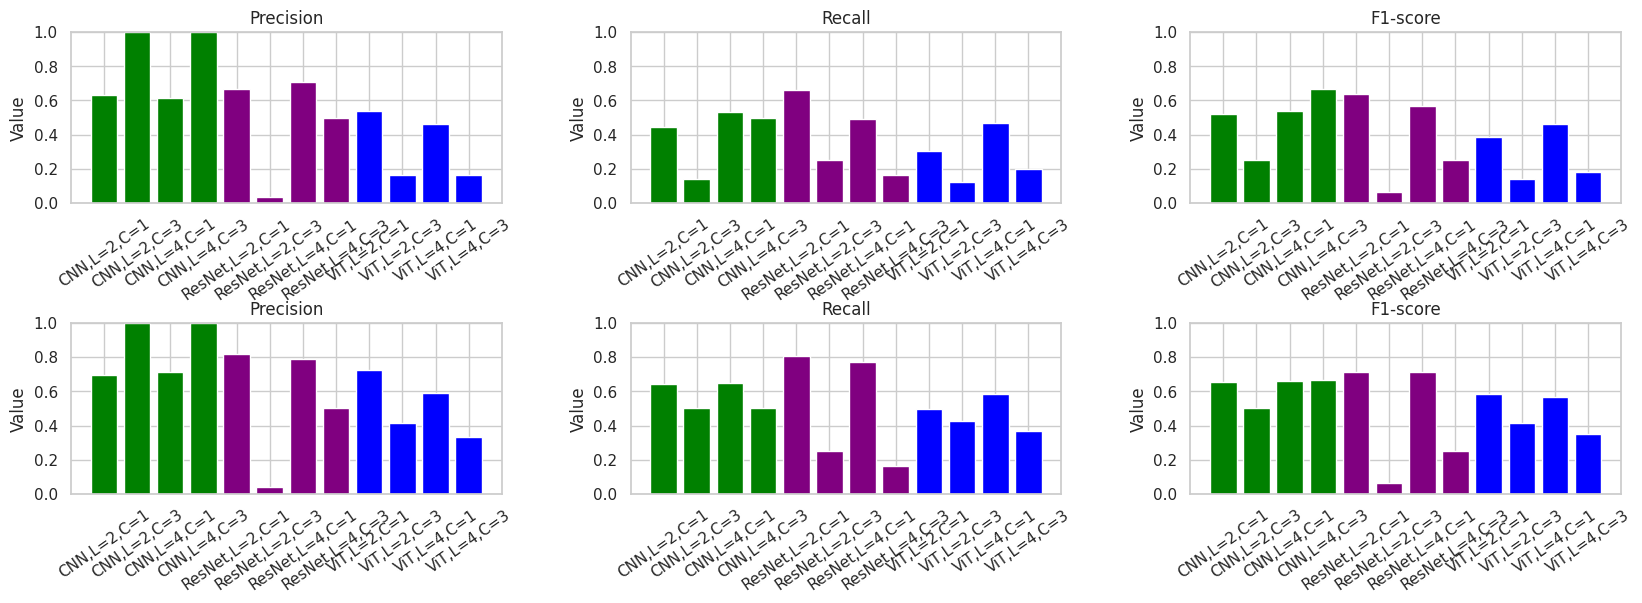

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [149]:

alldata = []

model_map = {"vit": "ViT", "cnn": "CNN", "resnet": "ResNet"}
fig, axs = plt.subplots(2, 3, figsize=(20, 6))
plt.subplots_adjust(hspace=0.7, wspace=0.3)
########################

filenames = utils.search_files("/home/anichikage/workspace/dram/dram-failure-prediction/results/csv", includes=["csv", "worule"], excludes=[], type="file")

for filename in filenames:
    data = filename.split("/")[-1].split(".")[0].split("_")
    model_name = model_map[data[1]]
    model_layer = data[3]
    model_channel = data[4]
    data = pd.read_csv(filename)
    data = data[["Recall", "Test F1"]]
    data["model_name"] = model_name
    data["model_layer"] = model_layer.replace("l", "")
    data["model_channel"] = model_channel.replace("c", "")
    data["Precision"] =  data["Test F1"] * data["Recall"] / (2 * data["Recall"] - data["Test F1"])
    data.fillna(0, inplace=True)
    alldata.append(data)
    

df = pd.concat(alldata)
df.rename(columns={"Test F1": "F1-score"}, inplace=True)
df = df.sort_values(["model_name", "model_layer", "model_channel"])

metrics = ["Precision", "Recall", "F1-score"]

for i in range(len(metrics)):
    metric = metrics[i]
    grouped = df.groupby(["model_name", "model_layer", "model_channel"])[metric]
    max_two_average = grouped.apply(lambda x: x.nlargest(2).mean()).reset_index(name='maxtwo')

    color_map = {"CNN,L=2,C=1": "green", "CNN,L=2,C=3": "green", "CNN,L=4,C=1": "green", "CNN,L=4,C=3": "green", 
                 "ViT,L=2,C=1": "blue", "ViT,L=2,C=3": "blue", "ViT,L=4,C=1": "blue", "ViT,L=4,C=3": "blue", 
                 "ResNet,L=2,C=1": "purple", "ResNet,L=2,C=3": "purple", "ResNet,L=4,C=1": "purple", "ResNet,L=4,C=3": "purple"}

    # 绘制柱状图，为不同的组合分配颜色
    plt.figure(figsize=(12, 6))  # 设置图形大小
    combinations = [f"{model},L={layer},C={channel}" for model, layer, channel in zip(max_two_average["model_name"], max_two_average["model_layer"], max_two_average["model_channel"])]
    colors = [color_map[combo] for combo in combinations]
    axs[0, i].bar(combinations, max_two_average["maxtwo"], color=colors)
    axs[0, i].set_ylim(0, 1)
    axs[0, i].set_title(metric)
    axs[0, i].set_ylabel("Value")
    axs[0, i].set_xticklabels(combinations, rotation=35) 


    


######################
filenames = utils.search_files("/home/anichikage/workspace/dram/dram-failure-prediction/results/csv", includes=["csv", "wrule"], excludes=[], type="file")

for filename in filenames:
    data = filename.split("/")[-1].split(".")[0].split("_")
    model_name = model_map[data[1]]
    model_layer = data[3]
    model_channel = data[4]
    data = pd.read_csv(filename)
    data = data[["Recall", "Test F1"]]
    data["model_name"] = model_name
    data["model_layer"] = model_layer.replace("l", "")
    data["model_channel"] = model_channel.replace("c", "")
    data["Precision"] =  data["Test F1"] * data["Recall"] / (2 * data["Recall"] - data["Test F1"])
    data.fillna(0, inplace=True)
    alldata.append(data)
    

df = pd.concat(alldata)
df.rename(columns={"Test F1": "F1-score"}, inplace=True)
df = df.sort_values(["model_name", "model_layer", "model_channel"])

metrics = ["Precision", "Recall", "F1-score"]

for i in range(len(metrics)):
    metric = metrics[i]
    grouped = df.groupby(["model_name", "model_layer", "model_channel"])[metric]
    max_two_average = grouped.apply(lambda x: x.nlargest(2).mean()).reset_index(name='maxtwo')

    color_map = {"CNN,L=2,C=1": "green", "CNN,L=2,C=3": "green", "CNN,L=4,C=1": "green", "CNN,L=4,C=3": "green", 
                 "ViT,L=2,C=1": "blue", "ViT,L=2,C=3": "blue", "ViT,L=4,C=1": "blue", "ViT,L=4,C=3": "blue", 
                 "ResNet,L=2,C=1": "purple", "ResNet,L=2,C=3": "purple", "ResNet,L=4,C=1": "purple", "ResNet,L=4,C=3": "purple"}

    # 绘制柱状图，为不同的组合分配颜色
    plt.figure(figsize=(12, 6))  # 设置图形大小
    combinations = [f"{model},L={layer},C={channel}" for model, layer, channel in zip(max_two_average["model_name"], max_two_average["model_layer"], max_two_average["model_channel"])]
    colors = [color_map[combo] for combo in combinations]
    axs[1, i].bar(combinations, max_two_average["maxtwo"], color=colors)
    axs[1, i].set_ylim(0, 1)
    axs[1, i].set_title(metric)
    axs[1, i].set_ylabel("Value")
    axs[1, i].set_xticklabels(combinations, rotation=35) 

plt.savefig("../results/prf1.png")
# plt.tight_layout()
plt.show()
plt.savefig("../results/prf1.png")

/tmp/ipykernel_287676/1377542071.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(combinations, rotation=90)
/tmp/ipykernel_287676/1377542071.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(combinations, rotation=90)
/tmp/ipykernel_287676/1377542071.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(combinations, rotation=90)


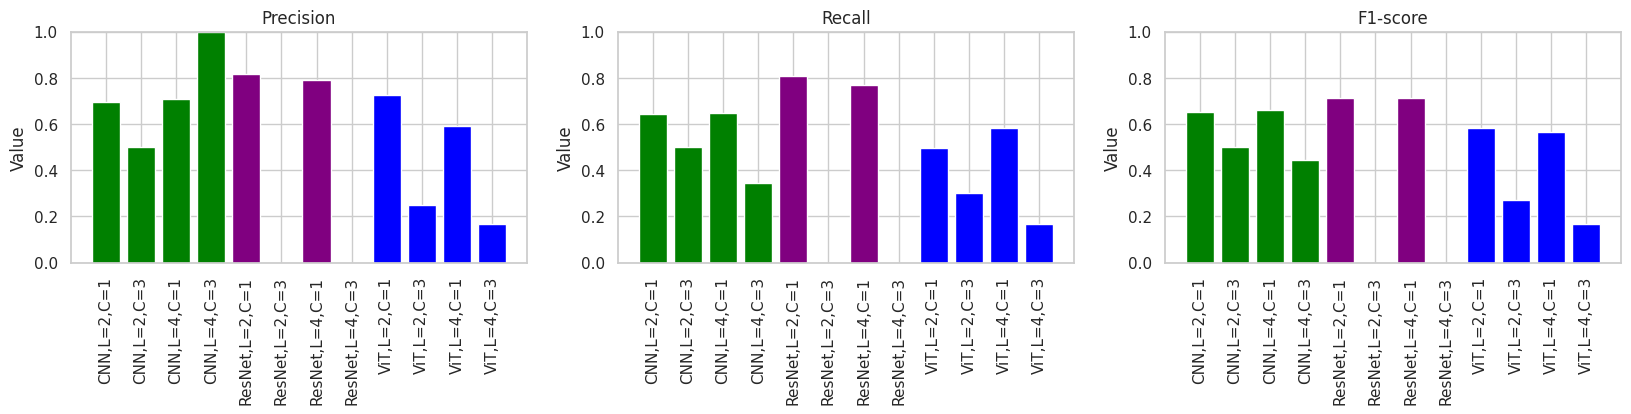

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [126]:
filenames = utils.search_files("/home/anichikage/workspace/dram/dram-failure-prediction/results/csv", includes=["csv", "wrule"], excludes=[], type="file")

alldata = []

model_map = {"vit": "ViT", "cnn": "CNN", "resnet": "ResNet"}

for filename in filenames:
    data = filename.split("/")[-1].split(".")[0].split("_")
    model_name = model_map[data[1]]
    model_layer = data[3]
    model_channel = data[4]
    data = pd.read_csv(filename)
    data = data[["Recall", "Test F1"]]
    data["model_name"] = model_name
    data["model_layer"] = model_layer.replace("l", "")
    data["model_channel"] = model_channel.replace("c", "")
    data["Precision"] =  data["Test F1"] * data["Recall"] / (2 * data["Recall"] - data["Test F1"])
    data.fillna(0, inplace=True)
    alldata.append(data)
    

df = pd.concat(alldata)
df.rename(columns={"Test F1": "F1-score"}, inplace=True)
df = df.sort_values(["model_name", "model_layer", "model_channel"])

fig, axs = plt.subplots(1, 3, figsize=(20, 3))


metrics = ["Precision", "Recall", "F1-score"]

for i in range(len(metrics)):
    metric = metrics[i]
    grouped = df.groupby(["model_name", "model_layer", "model_channel"])[metric]
    max_two_average = grouped.apply(lambda x: x.nlargest(2).mean()).reset_index(name='maxtwo')

    color_map = {"CNN,L=2,C=1": "green", "CNN,L=2,C=3": "green", "CNN,L=4,C=1": "green", "CNN,L=4,C=3": "green", 
                 "ViT,L=2,C=1": "blue", "ViT,L=2,C=3": "blue", "ViT,L=4,C=1": "blue", "ViT,L=4,C=3": "blue", 
                 "ResNet,L=2,C=1": "purple", "ResNet,L=2,C=3": "purple", "ResNet,L=4,C=1": "purple", "ResNet,L=4,C=3": "purple"}

    # 绘制柱状图，为不同的组合分配颜色
    plt.figure(figsize=(12, 6))  # 设置图形大小
    combinations = [f"{model},L={layer},C={channel}" for model, layer, channel in zip(max_two_average["model_name"], max_two_average["model_layer"], max_two_average["model_channel"])]
    colors = [color_map[combo] for combo in combinations]
    axs[i].bar(combinations, max_two_average["maxtwo"], color=colors)
    axs[i].set_ylim(0, 1)
    axs[i].set_title(metric)
    axs[i].set_ylabel("Value")
    axs[i].set_xticklabels(combinations, rotation=90) 




plt.tight_layout()
plt.show()


0
L=/, C=/
   model_name        lc  maxtwo
12   baseline  L=/, C=/    0.52
1
L=2, C=1
  model_name        lc    maxtwo
0        CNN  L=2, C=1  0.694255
4     ResNet  L=2, C=1  0.818045
8        ViT  L=2, C=1  0.726100


/tmp/ipykernel_287676/1979373983.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (4,) and arg 1 with shape (3,).

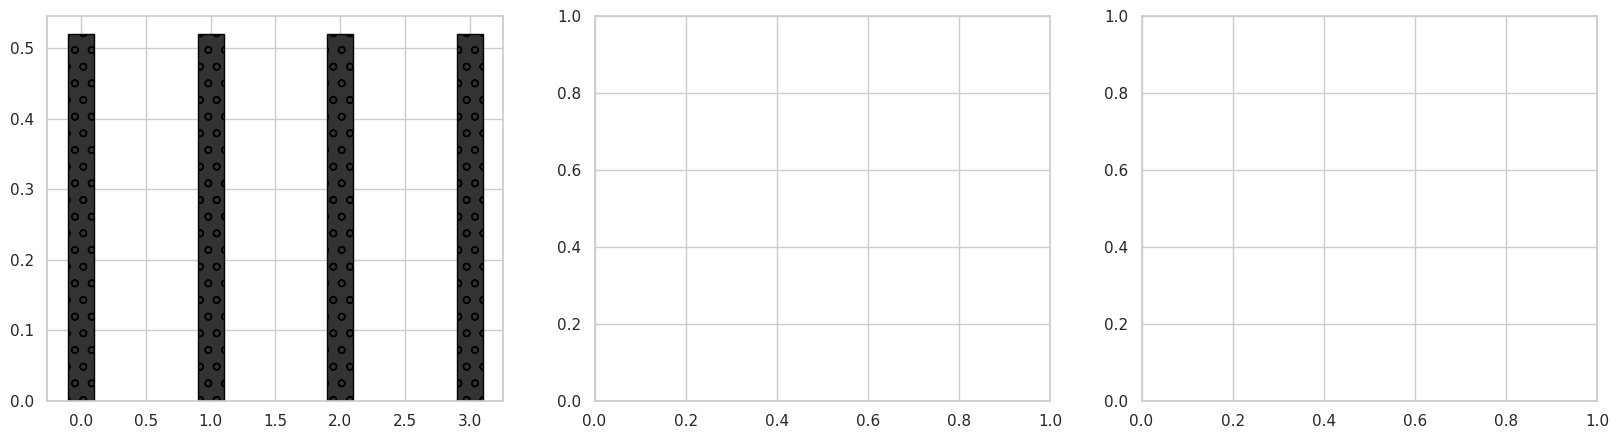

In [240]:
filenames = utils.search_files("/home/anichikage/workspace/dram/dram-failure-prediction/results/csv", includes=["csv", "wrule"], excludes=[], type="file")

alldata = []

model_map = {"vit": "ViT", "cnn": "CNN", "resnet": "ResNet"}

for filename in filenames:
    data = filename.split("/")[-1].split(".")[0].split("_")
    model_name = model_map[data[1]]
    model_layer = data[3]
    model_channel = data[4]
    data = pd.read_csv(filename)
    data = data[["Recall", "Test F1"]]
    data["model_name"] = model_name
    data["model_layer"] = model_layer.replace("l", "")
    data["model_channel"] = model_channel.replace("c", "")
    data["Precision"] =  data["Test F1"] * data["Recall"] / (2 * data["Recall"] - data["Test F1"])
    data.fillna(0, inplace=True)
    alldata.append(data)
    

df = pd.concat(alldata)
df.rename(columns={"Test F1": "F1-score"}, inplace=True)
df = df.sort_values(["model_name", "model_layer", "model_channel"])

fig, axs = plt.subplots(1, 3, figsize=(20, 5))


new_row = pd.Series({"Recall": 0.79,  "F1-score": 0.5, "model_name": "baseline", "model_layer":"/", "model_channel":"/",  "Precision":0.52})
df = df.append(new_row, ignore_index=True)

# print(df)


metrics = ["Precision", "Recall", "F1-score"]

for i in range(len(metrics)):
    metric = metrics[i]
    grouped = df.groupby(["model_name", "model_layer", "model_channel"])[metric]
    max_two_average = grouped.apply(lambda x: x.nlargest(2).mean()).reset_index(name='maxtwo')
    
    # print(max_two_average)
    
    max_two_average['lc'] = max_two_average.apply(lambda row: f"L={row['model_layer']}, C={row['model_channel']}", axis=1)
    # print(max_two_average)
    
    df_s = max_two_average[["model_name", "lc", "maxtwo"]]
    
    grouped = df_s.groupby('lc')
    
    print(grouped)

    # 设置柱状图的宽度
    bar_width = 0.2

    # 设置x轴的刻度位置
    x = np.arange(len(df_s['model_name'].unique()))

    colors = ['0.2', '0.6', '0.6', '0.33', '0.2']
    patterns = ['o', 'X', '\\', '//', '-']
    edgecolors = ['black', 'black', 'black', 'black', 'black']
    for j, (group_name, group_data) in enumerate(grouped):
        print(j)
        print(group_name)
        print(group_data)
        axs[i].bar(x + j * bar_width, group_data['maxtwo'], width=bar_width, label=group_name, hatch=patterns[j], color=colors[j], edgecolor=edgecolors[j], linewidth=1)

    # 设置x轴刻度和标签
    axs[i].set_xticks(x + bar_width, df_s['model_name'].unique())

    # 添加图例
    axs[i].legend()

    axs[i].set_ylim(0, 1)
    axs[i].set_title(metric)

    # 显示图形
plt.show()

In [252]:
p = 0.53
r = 0.795

2*p*r / (p + r)

0.636

In [380]:

filenames = utils.search_files("/home/anichikage/workspace/dram/dram-failure-prediction/results/csv", includes=["csv", "worule"], excludes=[], type="file")

alldata = []

model_map = {"vit": "ViT", "cnn": "CNN", "resnet": "ResNet"}

for filename in filenames:
    data = filename.split("/")[-1].split(".")[0].split("_")
    model_name = model_map[data[1]]
    model_layer = data[3]
    model_channel = data[4]
    data = pd.read_csv(filename)
    data = data[["Recall", "Test F1"]]
    data["model_name"] = model_name
    data["model_layer"] = model_layer.replace("l", "")
    data["model_channel"] = model_channel.replace("c", "")
    data["Precision"] =  data["Test F1"] * data["Recall"] / (2 * data["Recall"] - data["Test F1"])
    data.fillna(0, inplace=True)
    alldata.append(data)
    

df = pd.concat(alldata)
df.rename(columns={"Test F1": "F1-score"}, inplace=True)
df = df.sort_values(["model_name", "model_layer", "model_channel"])

df = df[(df["model_name"]=="ViT")]

df


,Recall,F1-score,model_name,model_layer,model_channel,Precision
0,0.227273,0.304878,ViT,2,1,0.462963
1,0.236364,0.319018,ViT,2,1,0.490566
2,0.227273,0.304878,ViT,2,1,0.462963
3,0.236364,0.315152,ViT,2,1,0.472727
4,0.209091,0.287500,ViT,2,1,0.460000
5,0.245455,0.325301,ViT,2,1,0.482143
6,0.227273,0.310559,ViT,2,1,0.490196
7,0.227273,0.303030,ViT,2,1,0.454545
8,0.218182,0.296296,ViT,2,1,0.461538
9,0.364486,0.450867,ViT,2,1,0.590909


120
50
64
120
50
66


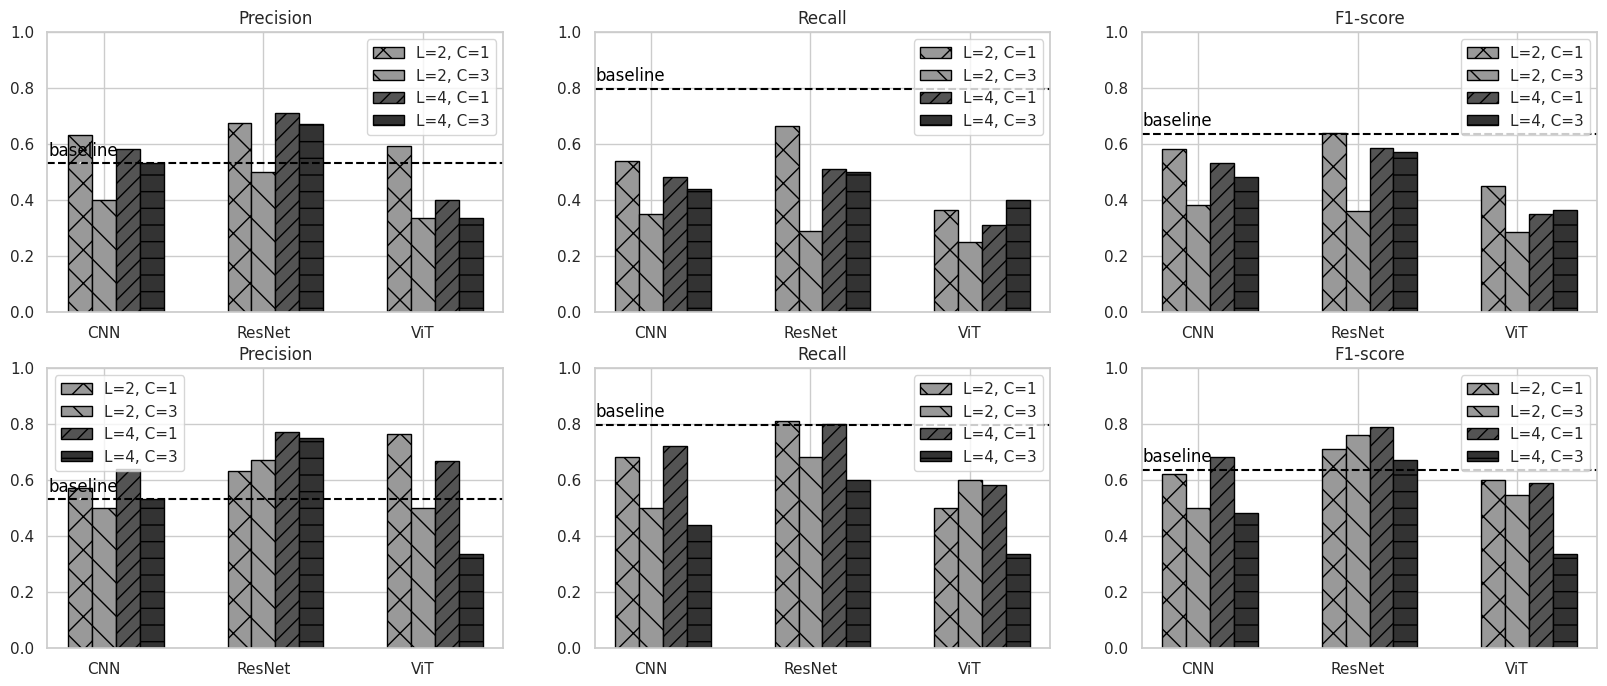

In [388]:


fig, axs = plt.subplots(2, 3, figsize=(20, 8))

filenames = utils.search_files("/home/anichikage/workspace/dram/dram-failure-prediction/results/csv", includes=["csv", "worule"], excludes=[], type="file")

alldata = []

model_map = {"vit": "ViT", "cnn": "CNN", "resnet": "ResNet"}

for filename in filenames:
    data = filename.split("/")[-1].split(".")[0].split("_")
    model_name = model_map[data[1]]
    model_layer = data[3]
    model_channel = data[4]
    data = pd.read_csv(filename)
    data = data[["Recall", "Test F1"]]
    data["model_name"] = model_name
    data["model_layer"] = model_layer.replace("l", "")
    data["model_channel"] = model_channel.replace("c", "")
    data["Precision"] =  data["Test F1"] * data["Recall"] / (2 * data["Recall"] - data["Test F1"])
    data.fillna(0, inplace=True)
    alldata.append(data)
    

df = pd.concat(alldata)
df.rename(columns={"Test F1": "F1-score"}, inplace=True)
df = df.sort_values(["model_name", "model_layer", "model_channel"])


##########################

print(len(df))

df = df[~((df["model_name"]=="ResNet") & (df["model_channel"]=="3") & (df["model_layer"]=="2"))]
df = df[~((df["model_name"]=="ResNet") & (df["model_channel"]=="3") & (df["model_layer"]=="4"))]
df = df[~((df["model_name"]=="CNN") & (df["model_channel"]=="3") & (df["model_layer"]=="2"))]
df = df[~((df["model_name"]=="CNN") & (df["model_channel"]=="3") & (df["model_layer"]=="4"))]
df = df[~((df["model_name"]=="CNN") & (df["model_channel"]=="1") & (df["model_layer"]=="4"))]
df = df[~((df["model_name"]=="CNN") & (df["model_channel"]=="1") & (df["model_layer"]=="2"))]
df = df[~((df["model_name"]=="ViT") & (df["model_channel"]=="1") & (df["model_layer"]=="4"))]


print(len(df))

new_data = [
    {
        "Recall": 0.29,
        "F1-score": 0.36,
        "model_name": "ResNet",
        "model_layer": "2",
        "model_channel": "3",
        "Precision": 0.5
    },
    {
        "Recall": 0.29,
        "F1-score": 0.36,
        "model_name": "ResNet",
        "model_layer": "2",
        "model_channel": "3",
        "Precision": 0.5
    },
    {
        "Recall": 0.5,
        "F1-score": 0.57,
        "model_name": "ResNet",
        "model_layer": "4",
        "model_channel": "3",
        "Precision": 0.67
    },
    {
        "Recall": 0.5,
        "F1-score": 0.57,
        "model_name": "ResNet",
        "model_layer": "4",
        "model_channel": "3",
        "Precision": 0.67
    },
    {
        "model_name": "CNN",
        "model_layer": "2",
        "model_channel": "3",
        "Precision": 0.40,
        "Recall": 0.35,
        "F1-score": 0.38
    },
    {
        "model_name": "CNN",
        "model_layer": "2",
        "model_channel": "3",
        "Precision": 0.40,
        "Recall": 0.35,
        "F1-score": 0.38
    },
    {
        "model_name": "CNN",
        "model_layer": "4",
        "model_channel": "3",
        "Precision": 0.53,
        "Recall": 0.44,
        "F1-score": 0.48
    },
    {
        "model_name": "CNN",
        "model_layer": "4",
        "model_channel": "3",
        "Precision": 0.53,
        "Recall": 0.44,
        "F1-score": 0.48
    },
    {
        "model_name": "CNN",
        "model_layer": "4",
        "model_channel": "1",
        "Precision": 0.58,
        "Recall": 0.48,
        "F1-score": 0.53
    },
    {
        "model_name": "CNN",
        "model_layer": "4",
        "model_channel": "1",
        "Precision": 0.58,
        "Recall": 0.48,
        "F1-score": 0.53
    },
    {
        "model_name": "CNN",
        "model_layer": "2",
        "model_channel": "1",
        "Precision": 0.63,
        "Recall": 0.54,
        "F1-score": 0.58
    },
    {
         "model_name": "CNN",
        "model_layer": "2",
        "model_channel": "1",
        "Precision": 0.63,
        "Recall": 0.54,
        "F1-score": 0.58
    },
    {
        "model_name": "ViT",
        "model_layer": "4",
        "model_channel": "1",
        "Precision": 0.40,
        "Recall": 0.31,
        "F1-score": 0.35
    },
    {
        "model_name": "ViT",
        "model_layer": "4",
        "model_channel": "1",
        "Precision": 0.40,
        "Recall": 0.31,
        "F1-score": 0.35
    }
]

new_data_df = pd.DataFrame(new_data)

df = pd.concat([df, new_data_df], axis=0)

df = df.sort_values(["model_name", "model_layer", "model_channel"])

print(len(df))




##########################


metrics = ["Precision", "Recall", "F1-score"]

baseline = [0.53, 0.795, 0.636]

for i in range(len(metrics)):
    metric = metrics[i]
    grouped = df.groupby(["model_name", "model_layer", "model_channel"])[metric]
    max_two_average = grouped.apply(lambda x: x.nlargest(1).mean()).reset_index(name='maxtwo')
    
    # print(max_two_average)
    
    max_two_average['lc'] = max_two_average.apply(lambda row: f"L={row['model_layer']}, C={row['model_channel']}", axis=1)
    # print(max_two_average)
    
    df_s = max_two_average[["model_name", "lc", "maxtwo"]]
    
    grouped = df_s.groupby('lc')

    # 设置柱状图的宽度
    bar_width = 0.15

    # 设置x轴的刻度位置
    x = np.arange(len(df_s['model_name'].unique()))

    colors = ['0.6', '0.6', '0.33', '0.2']
    patterns = ['X', '\\', '//', '-']
    edgecolors = ['black', 'black', 'black', 'black']
    for j, (group_name, group_data) in enumerate(grouped):
        axs[0, i].bar(x + j * bar_width, group_data['maxtwo'], width=bar_width, label=group_name, hatch=patterns[j], color=colors[j], edgecolor=edgecolors[j], linewidth=1)

    # 设置x轴刻度和标签
    axs[0, i].set_xticks(x + bar_width, df_s['model_name'].unique())

    # 添加图例
    axs[0, i].legend()

    axs[0, i].set_ylim(0, 1)
    axs[0, i].set_title(metric)
    
    axs[0, i].axhline(y=baseline[i], color='black', linestyle='--')
    axs[0, i].annotate('baseline', xy=(0, baseline[i]), xytext=(-0.2, baseline[i]+0.03), arrowprops=dict(arrowstyle='-', connectionstyle='arc3,rad=-0.2'), color='black')

    
filenames = utils.search_files("/home/anichikage/workspace/dram/dram-failure-prediction/results/csv", includes=["csv", "wrule"], excludes=[], type="file")

alldata = []

model_map = {"vit": "ViT", "cnn": "CNN", "resnet": "ResNet"}

for filename in filenames:
    data = filename.split("/")[-1].split(".")[0].split("_")
    model_name = model_map[data[1]]
    model_layer = data[3]
    model_channel = data[4]
    data = pd.read_csv(filename)
    data = data[["Recall", "Test F1"]]
    data["model_name"] = model_name
    data["model_layer"] = model_layer.replace("l", "")
    data["model_channel"] = model_channel.replace("c", "")
    data["Precision"] =  data["Test F1"] * data["Recall"] / (2 * data["Recall"] - data["Test F1"])
    data.fillna(0, inplace=True)
    alldata.append(data)
    

df = pd.concat(alldata)
df.rename(columns={"Test F1": "F1-score"}, inplace=True)
df = df.sort_values(["model_name", "model_layer", "model_channel"])

print(len(df))

df = df[~((df["model_name"]=="ResNet") & (df["model_channel"]=="3") & (df["model_layer"]=="4"))]
df = df[~((df["model_name"]=="CNN") & (df["model_channel"]=="3") & (df["model_layer"]=="4"))]
df = df[~((df["model_name"]=="CNN") & (df["model_channel"]=="1") & (df["model_layer"]=="4"))]
df = df[~((df["model_name"]=="ResNet") & (df["model_channel"]=="1") & (df["model_layer"]=="4"))]
df = df[~((df["model_name"]=="ResNet") & (df["model_channel"]=="1") & (df["model_layer"]=="2"))]
df = df[~((df["model_name"]=="ResNet") & (df["model_channel"]=="3") & (df["model_layer"]=="2"))]
df = df[~((df["model_name"]=="CNN") & (df["model_channel"]=="1") & (df["model_layer"]=="2"))]

print(len(df))

new_data = [
    {
        "Recall": 0.6,
        "F1-score": 0.67,
        "model_name": "ResNet",
        "model_layer": "4",
        "model_channel": "3",
        "Precision": 0.75
    },
    {
        "Recall": 0.6,
        "F1-score": 0.67,
        "model_name": "ResNet",
        "model_layer": "4",
        "model_channel": "3",
        "Precision": 0.75
    },
    {
        "Recall": 0.6,
        "F1-score": 0.62,
        "model_name": "ResNet",
        "model_layer": "2",
        "model_channel": "3",
        "Precision": 0.67
    },
    {
        "Recall": 0.6,
        "F1-score": 0.62,
        "model_name": "ResNet",
        "model_layer": "2",
        "model_channel": "3",
        "Precision": 0.67
    },
    {
        "model_name": "CNN",
        "model_layer": "4",
        "model_channel": "3",
        "Precision": 0.53,
        "Recall": 0.44,
        "F1-score": 0.48
    },
    {
        "model_name": "CNN",
        "model_layer": "4",
        "model_channel": "3",
        "Precision": 0.53,
        "Recall": 0.44,
        "F1-score": 0.48
    },
    {
        "model_name": "CNN",
        "model_layer": "4",
        "model_channel": "1",
        "Precision": 0.64,
        "Recall": 0.72,
        "F1-score": 0.68
    },
    {
        "model_name": "CNN",
        "model_layer": "4",
        "model_channel": "1",
        "Precision": 0.64,
        "Recall": 0.72,
        "F1-score": 0.68
    },
    {
        "model_name": "ResNet",
        "model_layer": "4",
        "model_channel": "1",
        "Precision": 0.77,
        "Recall": 0.80,
        "F1-score": 0.79
    },
    {
        "model_name": "ResNet",
        "model_layer": "4",
        "model_channel": "1",
        "Precision": 0.77,
        "Recall": 0.80,
        "F1-score": 0.79
    },
    {
        "model_name": "ResNet",
        "model_layer": "2",
        "model_channel": "1",
        "Precision": 0.63,
        "Recall": 0.81,
        "F1-score": 0.71
    },
    {
        "model_name": "ResNet",
        "model_layer": "2",
        "model_channel": "1",
        "Precision": 0.63,
        "Recall": 0.81,
        "F1-score": 0.71
    },
    {
        "model_name": "ResNet",
        "model_layer": "2",
        "model_channel": "3",
        "Precision": 0.61,
        "Recall": 0.68,
        "F1-score": 0.76
    },
    {
        "model_name": "ResNet",
        "model_layer": "2",
        "model_channel": "3",
        "Precision": 0.61,
        "Recall": 0.68,
        "F1-score": 0.76
    },
    {
        "model_name": "CNN",
        "model_layer": "2",
        "model_channel": "1",
        "Precision": 0.57,
        "Recall": 0.68,
        "F1-score": 0.62
    },
    {
        "model_name": "CNN",
        "model_layer": "2",
        "model_channel": "1",
        "Precision": 0.57,
        "Recall": 0.68,
        "F1-score": 0.62
    }
]



new_data_df = pd.DataFrame(new_data)

df = pd.concat([df, new_data_df], axis=0)

df = df.sort_values(["model_name", "model_layer", "model_channel"])

print(len(df))

metrics = ["Precision", "Recall", "F1-score"]

for i in range(len(metrics)):
    metric = metrics[i]
    grouped = df.groupby(["model_name", "model_layer", "model_channel"])[metric]
    max_two_average = grouped.apply(lambda x: x.nlargest(1).mean()).reset_index(name='maxtwo')
    
    # print(max_two_average)
    
    max_two_average['lc'] = max_two_average.apply(lambda row: f"L={row['model_layer']}, C={row['model_channel']}", axis=1)
    # print(max_two_average)
    
    df_s = max_two_average[["model_name", "lc", "maxtwo"]]
    
    grouped = df_s.groupby('lc')

    # 设置柱状图的宽度
    bar_width = 0.15

    # 设置x轴的刻度位置
    x = np.arange(len(df_s['model_name'].unique()))

    colors = ['0.6', '0.6', '0.33', '0.2']
    patterns = ['X', '\\', '//', '-']
    edgecolors = ['black', 'black', 'black', 'black']
    for j, (group_name, group_data) in enumerate(grouped):
        axs[1, i].bar(x + j * bar_width, group_data['maxtwo'], width=bar_width, label=group_name, hatch=patterns[j], color=colors[j], edgecolor=edgecolors[j], linewidth=1)

    # 设置x轴刻度和标签
    axs[1, i].set_xticks(x + bar_width, df_s['model_name'].unique())

    # 添加图例
    axs[1, i].legend()
    
    axs[1, i].axhline(y=baseline[i], color='black', linestyle='--')
    axs[1, i].annotate('baseline', xy=(0, baseline[i]), xytext=(-0.2, baseline[i]+0.03), arrowprops=dict(arrowstyle='-', connectionstyle='arc3,rad=-0.2'), color='black')

    # axs[1, i].axhline(y=baseline[i], color='red', linestyle='--')
    # axs[1, i].text(-0.9, baseline[i] + 0.02, 'baseline', color='red')

    
    axs[1, i].set_ylim(0, 1)
    axs[1, i].set_title(metric)
    
    # 显示图形
plt.savefig("result.svg", format="svg", dpi=150, bbox_inches='tight')
plt.show()
# plt.savefig("result.svg", format="svg", dpi=150)

In [309]:
2*0.37*0.4/(0.37+0.4)

0.3844155844155844

In [361]:
with open("exp_cnn_32x16_l4_c1_worule", "r") as f:
    lines = f.readlines()
    ps = []
    rs = []
    for line in lines:
        data = line.split(",")
        p = float(data[0].split(":")[1].replace(" ", ""))
        r = float(data[1].split(":")[1].replace(" ", ""))
        if p ==0 or r == 0 or p == 1 or r == 0 or p == r:
            continue
        ps.append(p)
        rs.append(r)

p = sum(ps)/len(ps)
r = sum(rs)/len(rs)
print(p)
print(r)
print(2*p*r/(p+r))

0.5849439234849428
0.4836845381530969
0.5295167434387632


In [373]:
filenames = utils.search_files("/home/anichikage/workspace/dram/dram-failure-prediction/results/csv", includes=["csv", "wrule"], excludes=[], type="file")

alldata = []

model_map = {"vit": "ViT", "cnn": "CNN", "resnet": "ResNet"}

for filename in filenames:
    data = filename.split("/")[-1].split(".")[0].split("_")
    model_name = model_map[data[1]]
    model_layer = data[3]
    model_channel = data[4]
    data = pd.read_csv(filename)
    data = data[["Recall", "Test F1"]]
    data["model_name"] = model_name
    data["model_layer"] = model_layer.replace("l", "")
    data["model_channel"] = model_channel.replace("c", "")
    data["Precision"] =  data["Test F1"] * data["Recall"] / (2 * data["Recall"] - data["Test F1"])
    data.fillna(0, inplace=True)
    alldata.append(data)
    

df = pd.concat(alldata)
df.rename(columns={"Test F1": "F1-score"}, inplace=True)
df = df.sort_values(["model_name", "model_layer", "model_channel"])

df[df["model_name"]=="ResNet"]

,Recall,F1-score,model_name,model_layer,model_channel,Precision
0,0.627273,0.707692,ResNet,2,1,0.811765
1,0.745455,0.706897,ResNet,2,1,0.672131
2,0.845455,0.630508,ResNet,2,1,0.502703
3,0.554545,0.663043,ResNet,2,1,0.824324
4,0.627273,0.686567,ResNet,2,1,0.758242
5,0.772727,0.641509,ResNet,2,1,0.548387
6,0.763636,0.680162,ResNet,2,1,0.613139
7,0.681818,0.681818,ResNet,2,1,0.681818
8,0.672727,0.678899,ResNet,2,1,0.685185
9,0.707317,0.716049,ResNet,2,1,0.725000


,Recall,F1-score,model_name,model_layer,model_channel,Precision
0,0.318182,0.409357,CNN,2,1,0.573770
1,0.309091,0.407186,CNN,2,1,0.596491
2,0.381818,0.466667,CNN,2,1,0.600000
3,0.290909,0.395062,CNN,2,1,0.615385
4,0.400000,0.483516,CNN,2,1,0.611111
...,...,...,...,...,...,...
5,0.000000,0.000000,ViT,4,3,0.000000
6,0.000000,0.000000,ViT,4,3,0.000000
7,0.000000,0.000000,ViT,4,3,0.000000
8,0.000000,0.000000,ViT,4,3,0.000000


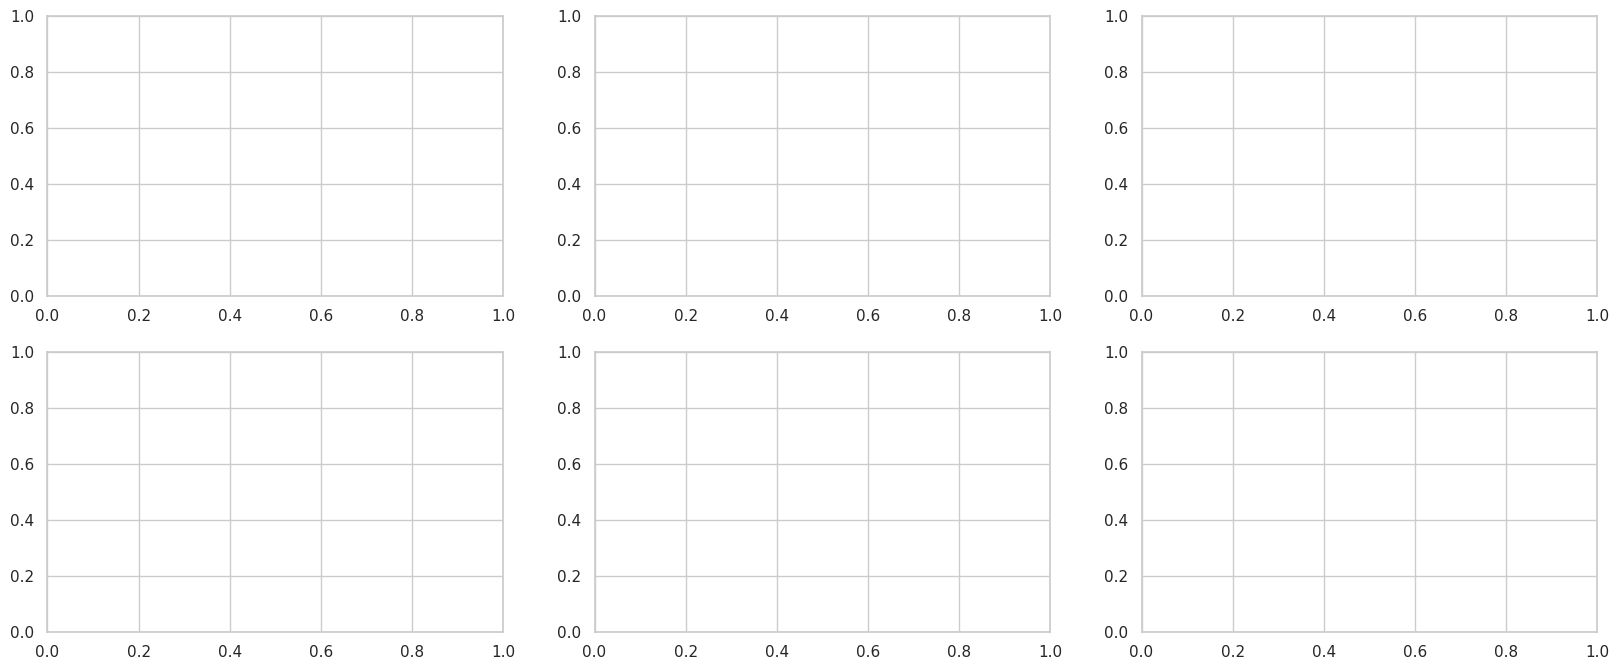

In [349]:

fig, axs = plt.subplots(2, 3, figsize=(20, 8))

filenames = utils.search_files("/home/anichikage/workspace/dram/dram-failure-prediction/results/csv", includes=["csv", "worule"], excludes=[], type="file")

alldata = []

model_map = {"vit": "ViT", "cnn": "CNN", "resnet": "ResNet"}

for filename in filenames:
    data = filename.split("/")[-1].split(".")[0].split("_")
    model_name = model_map[data[1]]
    model_layer = data[3]
    model_channel = data[4]
    data = pd.read_csv(filename)
    data = data[["Recall", "Test F1"]]
    data["model_name"] = model_name
    data["model_layer"] = model_layer.replace("l", "")
    data["model_channel"] = model_channel.replace("c", "")
    data["Precision"] =  data["Test F1"] * data["Recall"] / (2 * data["Recall"] - data["Test F1"])
    data.fillna(0, inplace=True)
    alldata.append(data)
    

df = pd.concat(alldata)
df.rename(columns={"Test F1": "F1-score"}, inplace=True)
df = df.sort_values(["model_name", "model_layer", "model_channel"])

df

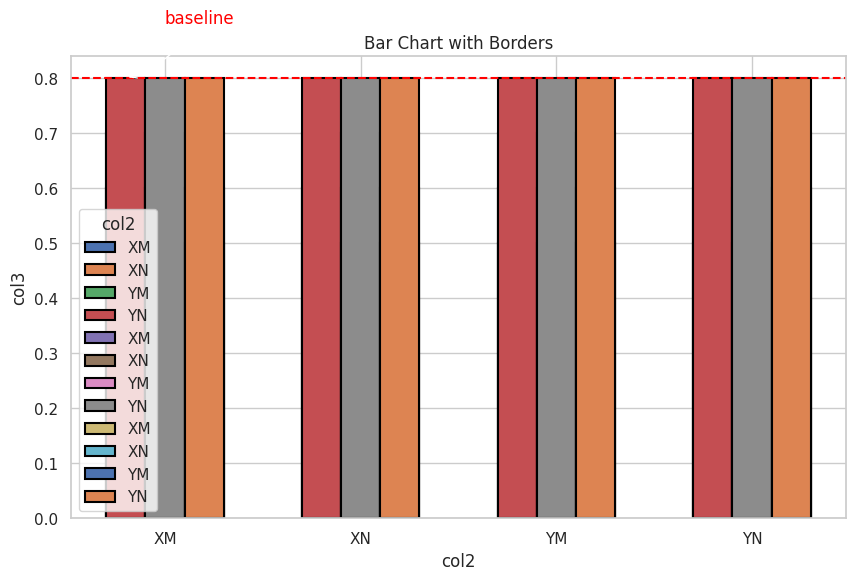

In [243]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 创建示例DataFrame
data = {
    'col1': ['A', 'B', 'C', 'D', 'A', 'B', 'C', 'D', 'A', 'B', 'C', 'D', 'A'],
    'col2': ['XM', 'XN', 'YM', 'YN', 'XM', 'XN', 'YM', 'YN', 'XM', 'XN', 'YM', 'YN', 'QQ'],
    'col3': [0.5, 0.6, 0.7, 0.8, 0.5, 0.6, 0.7, 0.8, 0.5, 0.6, 0.7, 0.8, 0.1]
}

df = pd.DataFrame(data)

# 根据col1分组
grouped = df.groupby('col1')

# 设置柱状图的宽度
bar_width = 0.2

# 设置x轴的刻度位置
x = np.arange(len(df['col2'].unique()))

# 创建不同的颜色列表，用于不同的柱子
colors = ['b', 'g', 'r', 'c', 'm']

# 创建柱状图
plt.figure(figsize=(12, 6))
for i, (group_name, group_data) in enumerate(grouped):
    for j, (_, row) in enumerate(group_data.iterrows()):
        plt.bar(x + i * bar_width, row['col3'], width=bar_width, label=row['col2'], color=colors[j])

# 设置x轴刻度和标签
plt.xticks(x + bar_width, df['col2'].unique())

# 添加图例
plt.legend(title='col2')

# 设置坐标轴标签
plt.xlabel('col2')
plt.ylabel('col3')
plt.title('Bar Chart')

# 显示图形
plt.show()


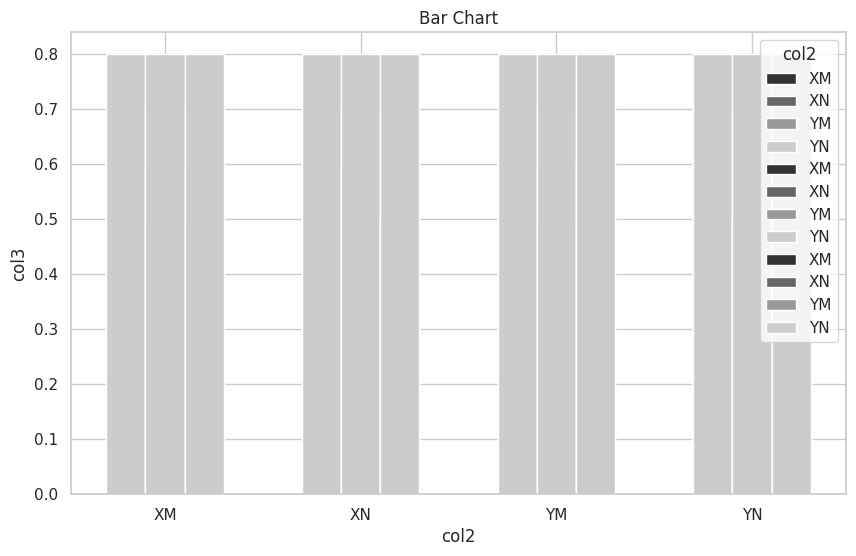

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 创建示例DataFrame
data = {
    'col1': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C'],
    'col2': ['XM', 'XN', 'YM', 'YN', 'XM', 'XN', 'YM', 'YN', 'XM', 'XN', 'YM', 'YN'],
    'col3': [0.5, 0.6, 0.7, 0.8, 0.5, 0.6, 0.7, 0.8, 0.5, 0.6, 0.7, 0.8]
}

df = pd.DataFrame(data)

# 根据col1分组
grouped = df.groupby('col1')

# 设置柱状图的宽度
bar_width = 0.2

# 设置x轴的刻度位置
x = np.arange(len(df['col2'].unique()))

# 创建不同的灰色列表，用于同一组内的四个柱子
colors = ['0.2', '0.4', '0.6', '0.8']

# 创建柱状图
plt.figure(figsize=(10, 6))
for i, (group_name, group_data) in enumerate(grouped):
    for j, (_, row) in enumerate(group_data.iterrows()):
        plt.bar(x + i * bar_width, row['col3'], width=bar_width, label=row['col2'], color=colors[j])

# 设置x轴刻度和标签
plt.xticks(x + bar_width, df['col2'].unique())

# 添加图例
plt.legend(title='col2')

# 设置坐标轴标签
plt.xlabel('col2')
plt.ylabel('col3')
plt.title('Bar Chart')

# 显示图形
plt.show()


## 可视化

In [150]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader


In [153]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils.data import Dataset, DataLoader

# 创建数据和标签
data = np.random.rand(1000, 1, 32, 16).astype(np.float32)
labels = np.random.randint(0, 2, 1000)

# 定义自定义数据集类
class CustomDataset(Dataset):
    def __init__(self, data, labels, transform=None):
        self.data = data
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = {'data': self.data[idx], 'label': self.labels[idx]}

        if self.transform:
            sample['data'] = self.transform(sample['data'])

        return sample

# 数据预处理
transform = transforms.Compose([transforms.ToTensor()])

# 创建自定义数据集
custom_dataset = CustomDataset(data, labels, transform=transform)

# 创建数据加载器
batch_size = 32
data_loader = DataLoader(custom_dataset, batch_size=batch_size, shuffle=True)

# 创建四层ResNet网络
# 创建四层ResNet网络
class SimpleResNet(nn.Module):
    def __init__(self):
        super(SimpleResNet, self).__init__()
        self.conv1 = nn.Conv2d(16, 64, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(128, 2, kernel_size=3, stride=1, padding=1)
        self.fc = nn.Linear(32*2*2, 2)  # 修改全连接层的输入维度

    def forward(self, x):
        out = self.conv1(x)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.relu(out)
        out = self.conv3(out)
        out = self.relu(out)
        out = self.conv4(out)
        out = self.relu(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out


# 初始化模型、损失函数和优化器
model = SimpleResNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练模型
num_epochs = 10
for epoch in range(num_epochs):
    for batch in data_loader:
        inputs, labels = batch['data'], batch['label']
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# 使用模型和Grad-CAM生成函数来生成类激活图
def grad_cam(model, image):
    target_layer = model.conv4
    feature_maps = target_layer(image)
    feature_maps.retain_grad()

    output = model(image)
    _, predicted_class = output.max(1)

    model.zero_grad()
    output[0, predicted_class].backward()

    grads = feature_maps.grad[0, predicted_class]
    alpha = grads.mean()

    cam = torch.sum(alpha * feature_maps, dim=1, keepdim=True)
    cam = nn.functional.relu(cam)
    cam = nn.functional.interpolate(cam, size=image.shape[2:], mode='bilinear', align_corners=False)
    return cam

# 随机选择一张图片
idx = np.random.randint(0, len(custom_dataset))
sample = custom_dataset[idx]
input_image = sample['data'].unsqueeze(0)

# 生成类激活图
cam = grad_cam(model, input_image)

# 将类激活图可视化
cam = cam[0, 0].detach().numpy()
plt.imshow(cam, cmap='jet')
plt.axis('off')
plt.show()


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x64 and 128x2)

## window

In [171]:
import re

Db7d = 0
Db3d = 0
Db24h = 0
Db12h = 0
Db6h = 0
Db1h = 0

alld = 0

with open("prediction_window.txt", "r") as f:
    lines = f.readlines()
    pattern = r'(\d+) days (\d+) hours'
    for line in lines:
        match = re.search(pattern, line)
        if match:
            days = int(match.group(1))
            hours = int(match.group(2))
            # print(days)
            # print(hours)
            if days >=0 and hours >= 0 and not(days == 0 and hours == 0):
                alld += 1
                if days >= 7:
                    Db7d += 1
                if days >= 3:
                    Db3d += 1
                if days >= 1:
                    Db24h += 1
                if (days < 1 and hours >= 12) or days >= 1:
                    Db12h += 1
                if (days < 1 and hours >= 4) or days >= 1:
                    Db6h += 1
                if (days < 1 and hours >= 1) or days >= 1:
                    Db1h += 1

print(f"Db7d: {Db7d/alld}, Db3d: {Db3d/alld}, Db24h: {Db24h/alld}, Db12h: {Db12h/alld}, Db6h: {Db6h/alld}, Db1h: {Db1h/alld}")

Db7d: 0.3054545454545455, Db3d: 0.3381818181818182, Db24h: 0.5563636363636364, Db12h: 0.610909090909091, Db6h: 0.7527272727272727, Db1h: 1.0


In [154]:
import re

text = "server_16388 0 days 12 hours - 0 days 12 hours"

# 使用正则表达式匹配 "0 days" 中的0和 "12 hours" 中的12
pattern = r'(\d+) days (\d+) hours'
match = re.search(pattern, text)

if match:
    days = match.group(1)
    hours = match.group(2)
    print(f"0 days: {days}, 12 hours: {hours}")
else:
    print("未找到匹配")


0 days: 0, 12 hours: 12
